<a href="https://colab.research.google.com/github/SoterGarcias/Portfolio/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#### **Data Science **
*by [Soter garcias](https://www.linkedin.com/in/soter-garcias-70165968/)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [25]:
# Importar os pacotes de manipulação de dados
import pandas as pd
import numpy as np

# Importar os pacotes de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importar pacote para plotar curvas ROC
!pip install scikit-plot

import scikitplot as skplt

# Importar pacotes relacionados à modelagem de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

# Importar pacote para lidar com desbalanceamento de classes
from imblearn.under_sampling import RandomUnderSampler

# Configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [8]:
# importar os dados para um dataframe.
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# lendo o arquivo de CSV para armazenar como df.
df = pd.read_csv(file_path)

# informações do DF como quantidade de linhas e colunas.
print("\nO Data Frame Original tem:",df.shape[0], "Linhas e ",df.shape[1],"Colunas \n")

# Fazendo splits do DF
test = df.sample(frac=0.15, random_state=0)

# Os dados de teste devem ser retirados do DF original
df = df.drop(test.index)

print("O Data Frame de Teste tem:",test.shape[0], "Linhas e",test.shape[1], "Colunas \n")



O Data Frame Original tem: 284807 Linhas e  31 Colunas 

O Data Frame de Teste tem: 42721 Linhas e 31 Colunas 



Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

### As 5 primeiras entradas

Como visto abaixo no `DF` temos as colunas Time V1 ... V28 Amount Class

##### **Descrição Geral:**
O conjunto de dados consiste em transações feitas com cartões de crédito por titulares de cartões europeus em setembro de 2013.
As transações ocorreram em dois dias, com 492 casos de fraude em um total de 284.807 transações.
O conjunto de dados é altamente desequilibrado, com a classe positiva (fraudes) representando apenas 0,172% de todas as transações.

##### **Características das Variáveis:**
* O conjunto de dados contém apenas variáveis numéricas de entrada.
* As variáveis de entrada são o resultado de uma transformação PCA (Análise de Componentes Principais), exceto as variáveis 'Tempo' e 'Amount'.
* As variáveis 'V1' a 'V28' são os principais componentes obtidos com PCA.
* A variável 'Tempo' representa os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.
* A variável 'Amount' representa o valor da transação.
* A variável 'Class' é a variável de resposta, assumindo o valor 1 em caso de fraude e 0 caso contrário.

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### O resumo estatístico do DataFrame

In [11]:
print(df.describe())

                Time             V1             V2             V3  \
count  242086.000000  242086.000000  242086.000000  242086.000000   
mean    94857.597379       0.001456      -0.000800      -0.001004   
std     47490.660832       1.956513       1.654883       1.514580   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54234.000000      -0.920406      -0.598659      -0.893374   
50%     84747.000000       0.019230       0.064567       0.177607   
75%    139362.000000       1.316034       0.803174       1.026561   
max    172792.000000       2.451888      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  242086.000000  242086.000000  242086.000000  242086.000000   
mean        0.000647      -0.000986      -0.001196      -0.000033   
std         1.417228       1.366284       1.326879       1.223095   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.848236      -0.6936

### Verificar se há valores ausentes

Como visto abaixo não temos nenhuma linha sem informações, todas as linhas estão preeenchidas com informações.

In [12]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Gráfico para ver o balanceamento do dataset

* A variável 'Class' é a variável de resposta, assumindo o valor 1 em caso de fraude e 0 caso contrário.

da base geral que tem 284.807 registro desses 418 registro são de fraudes.

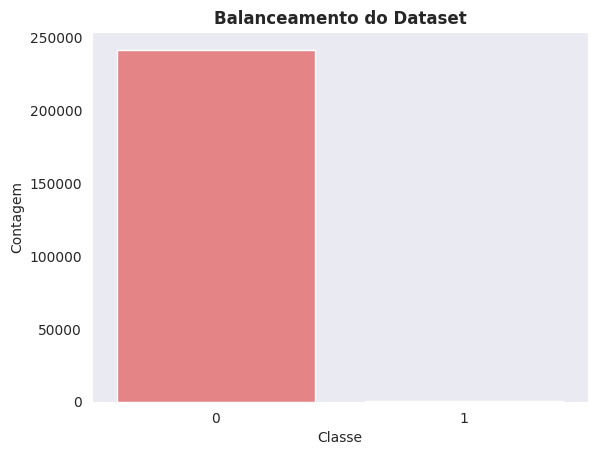

In [13]:
sns.countplot(x='Class', data=df, stat='count', color='#F47477')
plt.title('Balanceamento do Dataset', fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Contagem')

plt.show()

### Histograma para variável Time

* A variável 'Time' representa os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.

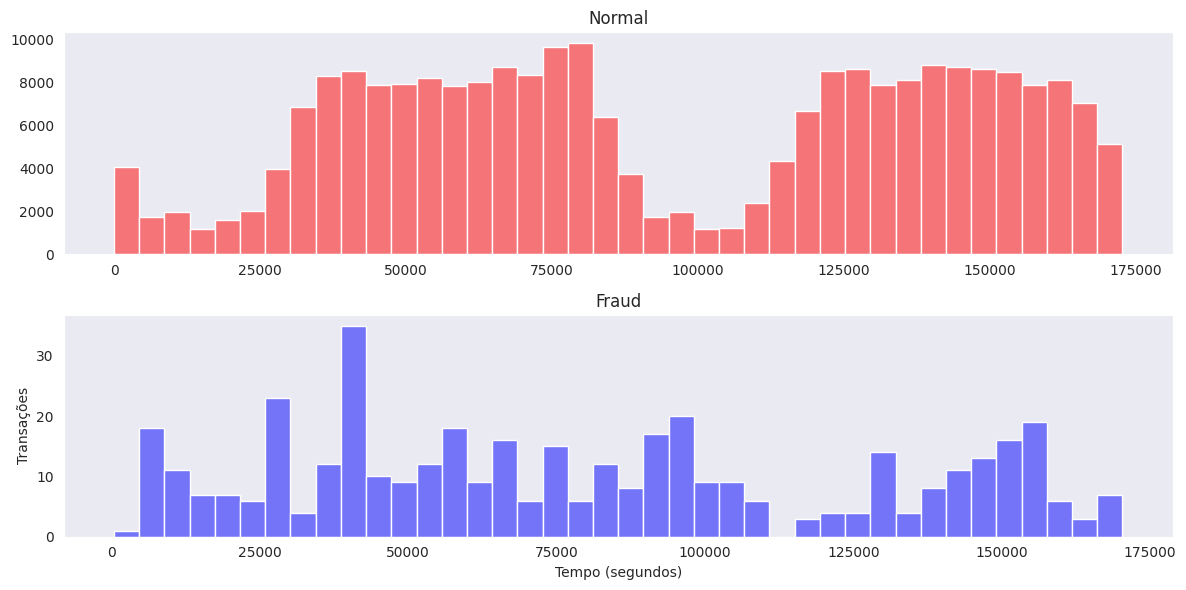

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='#F47477')
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='#7474F8')
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

### Histograma para variável Amount

<ipython-input-15-52547ee0dd7b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, palette=colors)


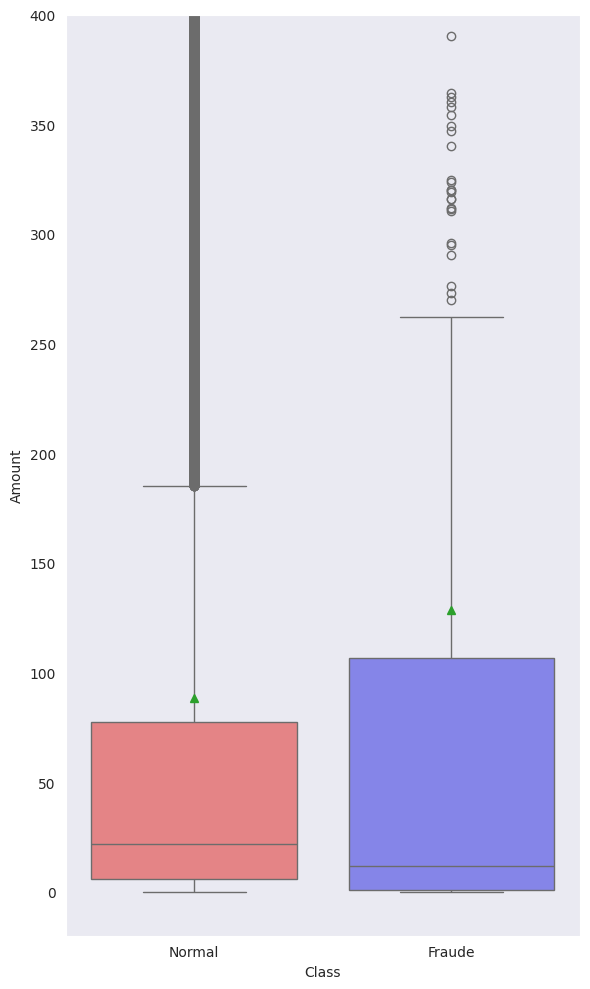

In [15]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

# Definindo as cores desejadas
colors = ["#F47477", "#7474F8"]

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, palette=colors)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout();

### Boxplot para varíavel Amount quando houver fraude `(Class == 1)`

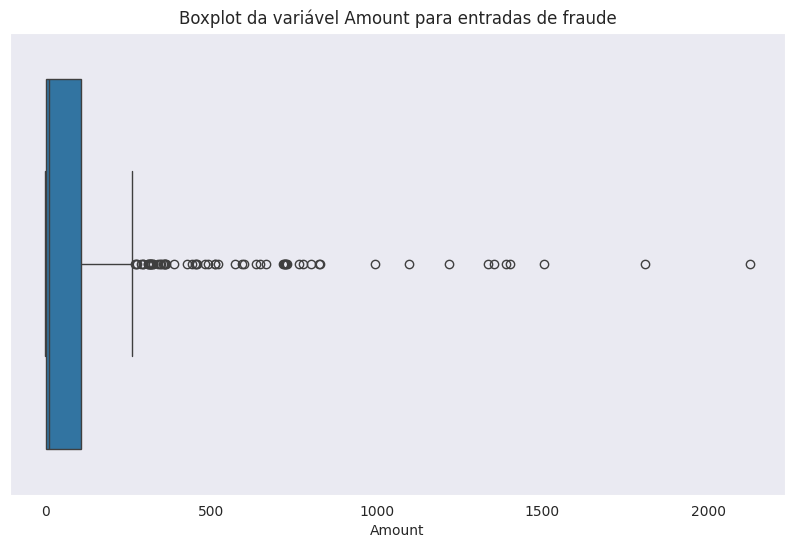

In [16]:
# Filtrando os dados para incluir apenas entradas com Class igual a 1 (fraude)
fraud_data = df[df['Class'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o boxplot da variável 'Amount' para as entradas de fraude
sns.boxplot(x='Amount', data=fraud_data)
plt.title('Boxplot da variável Amount para entradas de fraude')
plt.show()

### Matriz de correlação

* Os valores da matriz variam de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 indica ausência de correlação.
* Uma correlação positiva significa que as variáveis tendem a aumentar ou diminuir juntas. Por exemplo, se a correlação entre duas variáveis for próxima de 1, isso significa que quando uma variável aumenta, a outra também tende a aumentar.
* Uma correlação negativa significa que as variáveis tendem a se mover em direções opostas. Por exemplo, se a correlação entre duas variáveis for próxima de -1, isso significa que quando uma variável aumenta, a outra tende a diminuir.
* Valores próximos de 0 indicam uma correlação fraca ou ausência de correlação entre as variáveis.

A Matriz abaixo tem uma fraca correlação entre si, ficando todas elas próxima a 0

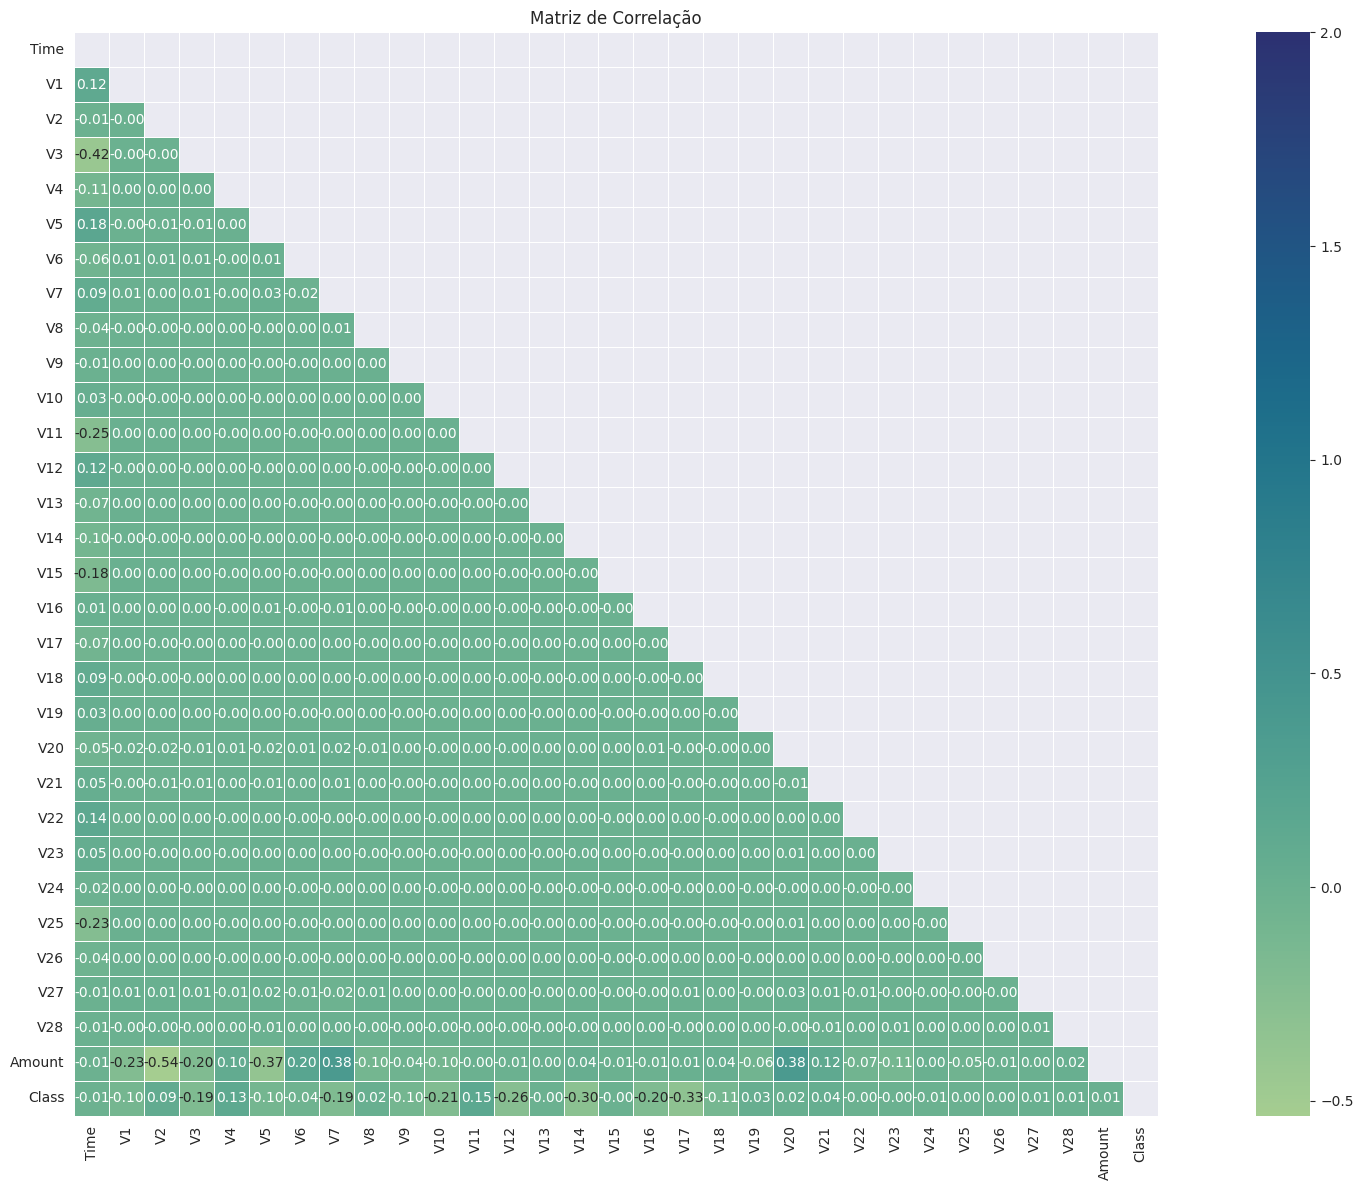

In [17]:
# Criando uma máscara para esconder a metade superior
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plotando o heatmap
fig, ax = plt.subplots(figsize=(20, 12))  # Correção: plt.subplot -> plt.subplots

sns.heatmap(df.corr(), mask=mask, fmt='.2f', square=True, linecolor='white', vmax=2.0, annot=True,
            linewidths=.5, cmap='crest')

plt.title('Matriz de Correlação')

plt.tight_layout()  # Correção: Ajustar o layout

plt.show()

### Valores da coluna Amount

Essa coluna são os valores referentes a

In [18]:
# Calculando a média da coluna 'Amount' para cada classe
media_por_classe = df.groupby('Class')['Amount'].mean()
maior_por_classe = df.groupby('Class')['Amount'].max()
menor_por_classe = df.groupby('Class')['Amount'].min()

print('Valores médios das transações')
print(media_por_classe,'\n')
print("Maior valor por classe:")
print(maior_por_classe,'\n')
print("\nMenor valor por classe:")
print(menor_por_classe,'\n')

Valores médios das transações
Class
0     88.543443
1    128.496722
Name: Amount, dtype: float64 

Maior valor por classe:
Class
0    19656.53
1     2125.87
Name: Amount, dtype: float64 


Menor valor por classe:
Class
0    0.0
1    0.0
Name: Amount, dtype: float64 



## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [19]:
# Normalizar as colunas Time e Amount
scaler = StandardScaler()
test[['Time', 'Amount']] = scaler.fit_transform(test[['Time', 'Amount']])

# Dividir o conjunto de dados em características (X) e rótulos (y)
X = test.drop('Class', axis=1)
y = test['Class']

# Dividir os dados em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear o conjunto de dados de treinamento usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Class
0    34126
1    34126
Name: count, dtype: int64


## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

###Modelo de Regressão Logística

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Desempenho do modelo de Regressão Logística:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8521
           1       0.11      0.83      0.20        24

    accuracy                           0.98      8545
   macro avg       0.56      0.91      0.60      8545
weighted avg       1.00      0.98      0.99      8545



<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

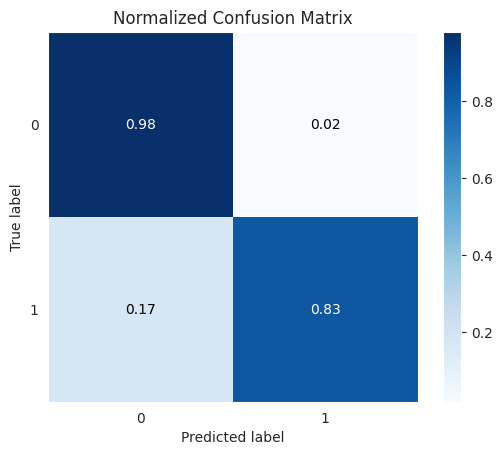

In [29]:
# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42)

# Treinar o modelo usando os dados de treinamento balanceados
logistic_model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões nos dados de validação
y_pred_logistic = logistic_model.predict(X_val)

# Avaliar o desempenho do modelo de Regressão Logística
print("Desempenho do modelo de Regressão Logística:")
print(classification_report(y_val, y_pred_logistic))

skplt.metrics.plot_confusion_matrix(y_val, y_pred_logistic, normalize=True)

###Modelode Random Forest

In [34]:
# Inicializar o modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Treinar o modelo usando os dados de treinamento balanceados
random_forest_model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões nos dados de validação
y_pred_rf = random_forest_model.predict(X_val)

# Avaliar o desempenho do modelo de Random Forest
print("Desempenho do modelo de Random Forest:")
print(classification_report(y_val, y_pred_rf))

Desempenho do modelo de Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8521
           1       0.95      0.75      0.84        24

    accuracy                           1.00      8545
   macro avg       0.97      0.87      0.92      8545
weighted avg       1.00      1.00      1.00      8545



## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

Os relatórios de classificação acima, podem dá uma visão detalhada do desempenho do modelo em diferentes métricas para cada classe. No caso de problemas de classificação binária como este, algumas métricas importantes a serem consideradas são:

1. Precision: A precisão é a proporção de verdadeiros positivos (TP) em relação a todos os exemplos classificados como positivos (TP + FP). Indica a precisão do modelo em prever positivos corretamente.
2. Recall: O recall é a proporção de verdadeiros positivos (TP) em relação a todos os exemplos que realmente pertencem à classe positiva (TP + FN). Indica a capacidade do modelo de encontrar todos os exemplos positivos.
3. F1-score: O F1-score é a média harmônica da precisão e do recall. É uma métrica útil quando há um desequilíbrio entre as classes, como neste caso. F1-score alcança seu melhor valor em 1 (melhor precisão e recall) e pior em 0.
Considerando os relatórios de classificação dos dois modelos:

###Modelo de Regressão Logística:
* Precision: A precisão para a classe 1 é baixa (0.12), o que significa que o modelo de Regressão Logística está identificando apenas uma pequena proporção de exemplos positivos corretamente em relação ao total de exemplos classificados como positivos.
* Recall: O recall para a classe 1 é alto (0.83), indicando que o modelo de Regressão Logística está capturando a maioria dos exemplos positivos.
* F1-score: O F1-score para a classe 1 é baixo (0.20), indicando que o modelo de Regressão Logística tem um desempenho geral baixo para a classe minoritária.

###Modelo de Random Forest:
* Precision: A precisão para a classe 1 é mais alta (0.95), indicando que o modelo de Random Forest está identificando uma proporção maior de exemplos positivos corretamente.
* Recall: O recall para a classe 1 é menor (0.75) em comparação com o modelo de Regressão Logística, indicando que o modelo de Random Forest está capturando uma proporção menor de exemplos positivos.
* F1-score: O F1-score para a classe 1 é mais alto (0.84) em comparação com o modelo de Regressão Logística, indicando um desempenho geral melhor para a classe minoritária.

Dado o desempenho superior do modelo de Random Forest em termos de precisão e F1-score para a classe minoritária, ele pode ser considerado melhor para este problema de classificação desbalanceada. No entanto, a escolha final entre os modelos pode depender dos requisitos específicos do problema e das métricas que são mais importantes para você.

## Conclusão

Com base na análise dos relatórios de classificação dos modelos de Regressão Logística e Random Forest, podemos tirar algumas conclusões:

1. Desempenho da Classe Minoritária (Fraude):
  * O modelo de Random Forest apresentou um desempenho geral superior para a classe minoritária (fraude), com uma precisão mais alta (0.95) e um F1-score mais elevado (0.84) em comparação com o modelo de Regressão Logística (precisão: 0.12, F1-score: 0.20).
  * Isso indica que o modelo de Random Forest é mais capaz de identificar corretamente transações fraudulentas em comparação com o modelo de Regressão Logística.
2. Desempenho da Classe Majoritária (Transações Normais):
  * Ambos os modelos tiveram um desempenho quase perfeito na identificação de transações normais (classe majoritária), com altas precisões e F1-scores.
  * No entanto, o modelo de Random Forest alcançou uma precisão e um F1-score ligeiramente menores para a classe majoritária em comparação com o modelo de Regressão Logística. Isso pode ser devido ao modelo de Random Forest ser mais propenso a classificar erroneamente algumas transações normais como fraudulentas.
3. Escolha do Melhor Modelo:
  * Considerando a importância de identificar corretamente transações fraudulentas em um problema de detecção de fraude, o modelo de Random Forest parece ser mais adequado devido ao seu melhor desempenho na classe minoritária.
  * No entanto, é importante levar em consideração outros fatores, como custo computacional e interpretabilidade do modelo, ao tomar uma decisão final.

Portanto, a conclusão é que o modelo de Random Forest é mais eficaz para este problema específico de detecção de fraude em comparação com o modelo de Regressão Logística, devido ao seu desempenho superior na identificação de transações fraudulentas.





